In [2]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("../Life_Expectancy_preprocessed_v2.csv", index_col=0)

In [7]:
data.head()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Life expectancy
0,Afghanistan,2015,263,62,0.01,71.279624,65,1154,19.1,83,...,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,65.0
1,Afghanistan,2014,271,64,0.01,73.523582,62,492,18.6,86,...,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,59.9
2,Afghanistan,2013,268,66,0.01,73.219243,64,430,18.1,89,...,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,59.9
3,Afghanistan,2012,272,69,0.01,78.184215,67,2787,17.6,93,...,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,59.5
4,Afghanistan,2011,275,71,0.01,7.097109,68,3013,17.2,97,...,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,59.2


### EDA

In [8]:
data.columns

Index(['Country', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Life expectancy'],
      dtype='object')

We don't need a country name and year doing clustering

In [11]:
input_data = data.iloc[:, 2:]

In [13]:
input_data.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Life expectancy
0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,65.0
1,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,59.9
2,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,59.9
3,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,59.5
4,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,59.2


'Developed == 0' means that it is developing country. Otherwise, it is developed country.


Let's hide 'Developed' feature and figure out that we can find differentiate whether the country is 'Developed' or 'Developing'

In [14]:
input_data.drop(columns=['Developed'], inplace = True)

We need to scale the dataset.
Becasue unscaled datasets affect clustering results due to differences in distances between dimensions.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input_data)

### Clustering

In [18]:
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        # axs[ind].set_ylim([0, len(sil_values) + 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

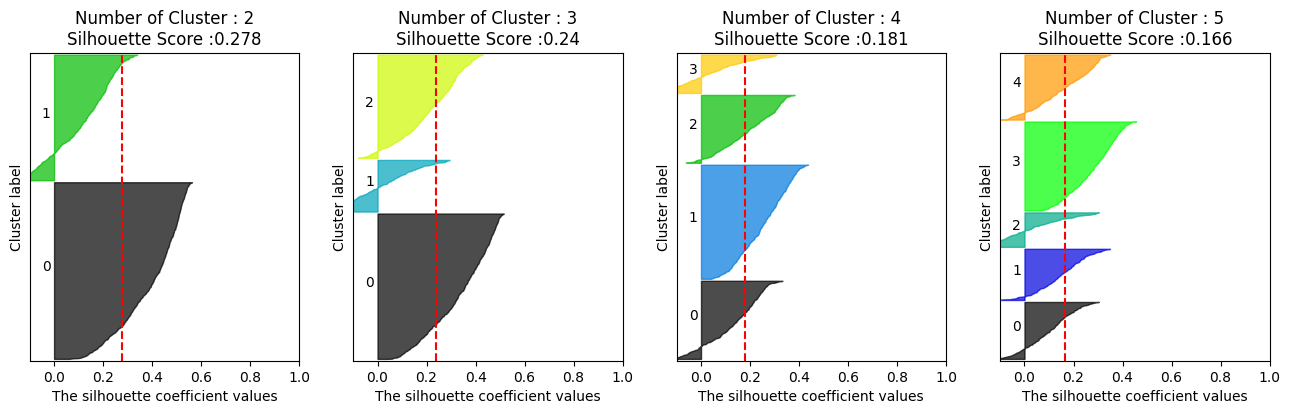

In [19]:
visualize_silhouette([2,3,4,5], scaled_data)

It seems silluete diagram with 4 clusters shows godd result. Let's try 2 clusters.

In [54]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters = 4, max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(scaled_data)

c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualize the clusters using T-SNE algorithm. 

This is one of the dimensionality reduction algorithms and is useful for visualization because it maintains the relative distance between data even after two-dimensional reduction.

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(scaled_data)

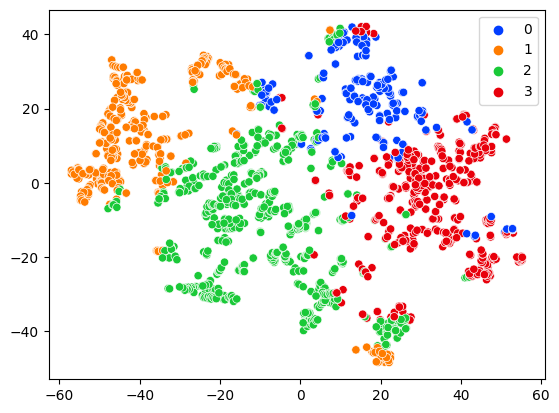

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("bright", 4)
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue = cluster_labels, legend='full', palette=palette)
plt.show()

See if it is really divided with 'Developed'.

In [32]:
developed = data['Developed']

C:\Users\MOONSOO\AppData\Local\Temp\ipykernel_11192\3909629993.py:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue = developed, legend='full', palette=palette)


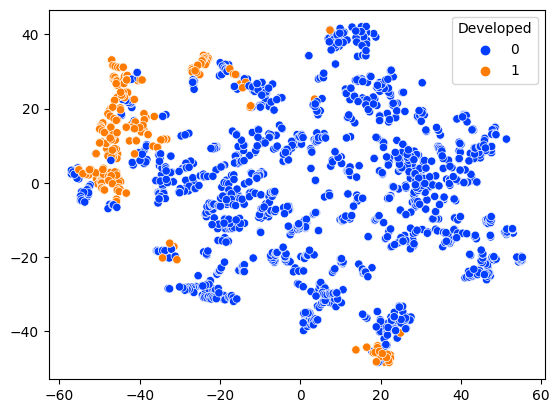

In [62]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue = developed, legend='full', palette=palette)
plt.show()

# Blue is Developig Country. Orange is Developed Country.

C:\Users\MOONSOO\AppData\Local\Temp\ipykernel_11192\2669886377.py:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(x=transformed[:,0], y=transformed[:,1], style = cluster_labels, hue = developed, legend='full', palette=palette)


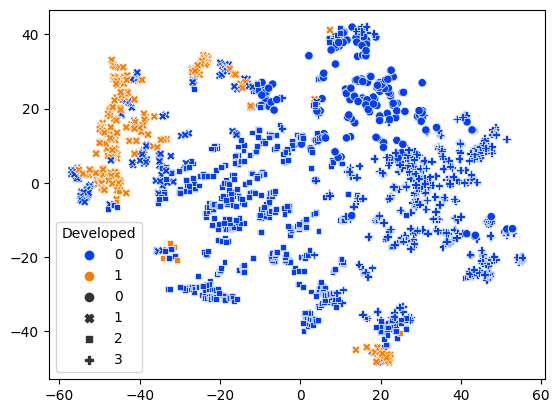

In [61]:
palette = sns.color_palette("bright", 4)
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], style = cluster_labels, hue = developed, legend='full', palette=palette)
plt.show()

### Interpretation of results